In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import style
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


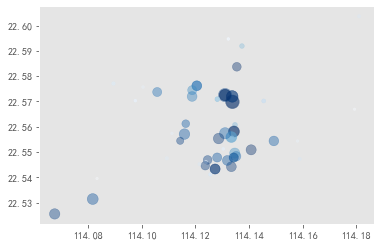

In [12]:
data = pd.read_csv('second_hand_ house.csv')
plt.scatter(data['经度'], data['纬度'], 
           s=data['房屋单价']/500,c=data['参考总价'],
            alpha=0.4, cmap='Blues')  # s:点的大小 alpha:标量
plt.grid()
data.head()

In [13]:
# 极差
# 只针对定量字段
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return(krange)

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data, key1, key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))

参考首付极差为 52.500000 
参考总价极差为 175.000000


<AxesSubplot:>

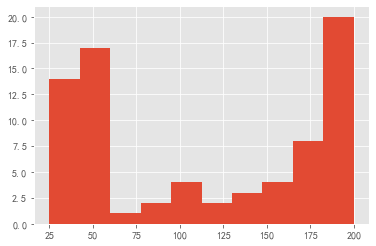

In [14]:
# 频率分布情况 - 定量字段
# 1.通过直方图直接判断分组组数， 一般8-16即可
data[key2].hist(bins=10)

In [15]:
# 2.求出分组区间
gcut = pd.cut(data[key2], 10, right=False) # 按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
gcut_count = gcut.value_counts(sort=False)
data['%s分组区间' % key2] = gcut.values
print(gcut.head(), '\n-------------')
gcut_count

0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)] 
-------------


[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [16]:
# 3. 求出目标字段频率分布的其他统计量 -- 频数，频率，累积频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={'参考总价':'频数'}, inplace=True)
r_zj['频率'] = r_zj / r_zj['频数'].sum()
r_zj['累积频率'] = r_zj['频率'].cumsum() # 计算累积频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x:"%.2f%%" % (x*100))
r_zj['累积频率%'] = r_zj['累积频率'].apply(lambda x:"%.2f%%" % (x*100))
r_zj.style.bar(subset=['频率', '累积频率'], color='green', width=100)

,频数,频率,累积频率,频率%,累积频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.013333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.026667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.053333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.026667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.040000,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.053333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1.000000,26.67%,100.00%


## 对比分析

                A_sale      B_sale
2017-06-01  565.754353  217.650232
2017-06-02   11.239735  893.732230
2017-06-03  163.195294  568.114382
2017-06-04  681.424784  256.461034
2017-06-05  389.041335  528.697655
2017-06-06  248.120011  797.858289
2017-06-07   48.750204  268.246032
2017-06-08  761.624980  633.488927
2017-06-09  548.147238  643.276450
2017-06-10  426.557609  508.488011


<AxesSubplot:title={'center':'AB产品销量对比'}>

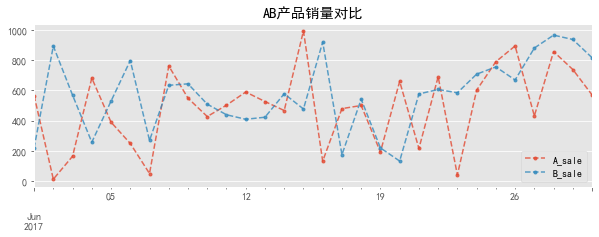

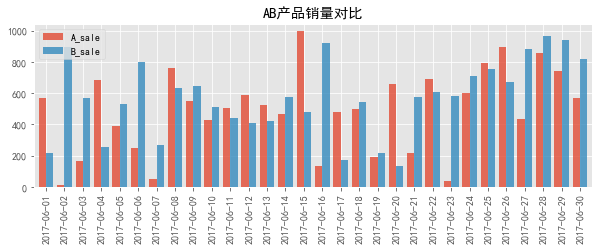

In [17]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较
data = pd.DataFrame(np.random.rand(30, 2) * 1000,
                   columns=['A_sale', 'B_sale'],
                   index=pd.period_range('20170601', '20170630'))
print(data.head(10))

# 折线图比较
data.plot(kind='line', style='--.', alpha=0.8, figsize=(10, 3), title='AB产品销量对比')

# 多系列柱状图比较
data.plot(kind='bar', width=0.8, alpha=0.8, figsize=(10,3), title='AB产品销量对比')

[Text(0, 0, '2017-06-01'),
 Text(6, 0, '2017-06-07'),
 Text(12, 0, '2017-06-13'),
 Text(18, 0, '2017-06-19'),
 Text(24, 0, '2017-06-25')]

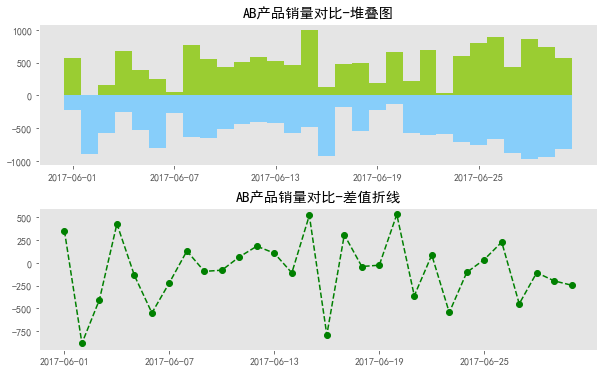

In [19]:
# 1、绝对数比较 → 相减
# （3）柱状图堆叠图+差值折线图比较

# 创建子图及设置间隔
fig3 = plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.3)

# 创建堆叠图
ax1 = fig3.add_subplot(2,1,1)
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x, y1, width=1, facecolor='yellowgreen')
plt.bar(x, y2, width=1, facecolor='lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

# 创建差值折线图
ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale']
plt.plot(x, y3, '--go')

plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

In [ ]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构
